In [1]:
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import re
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
pd.options.mode.chained_assignment = None 
%matplotlib inline

### Data Preparation

In [2]:
# Generate the list of available survey files in the working directory. Load the survey files and store all dataframes in a list with the corresponding survey year. 
# This allows to easily access all data for further analysis.

# folder should be in your standard working directory
folder = "stackoverflow survey results 2011-2019"
files = [f for f in listdir(folder) if isfile(join(folder, f))]
list_df = []

for survey in files:
    skiprows = 0
    if survey == files[4]:
    #in year 2015 the column headers are in row 2 of the .csv file
        skiprows = 1
    df = pd.read_csv(os.path.join(folder, survey), encoding='latin', skiprows=skiprows, low_memory=False)
    list_df.append([survey[:4], df])

In [3]:
#dataframe can be accessed by index e.g. 0 --> 2011, 1 --> 2012, ...

dataframe_index = 5

print("Year "+str(list_df[dataframe_index][0])+" Survey") 
list_df[dataframe_index][1].head()

Year 2016 Survey


,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Question 1**
Can we find any trend over time related to the participants and their employment?

In [51]:
participants_per_year = [len(list_df[i][1]) for i in range(0, len(list_df))]
years = [list_df[i][0] for i in range(0, len(list_df))]
increase = (len(list_df[8][1]) - len(list_df[0][1])) / len(list_df[8][1])

participants between 2011 and 2019 increased by factor 32


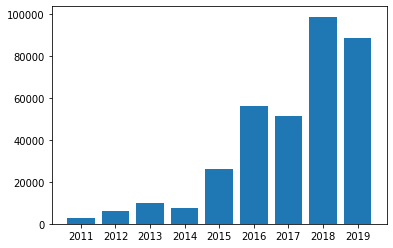

In [52]:
plt.bar(years, participants_per_year)
plt.show;
print("participants between 2011 and 2019 increased by factor {}".format(round(len(list_df[8][1])/len(list_df[0][1]))))

In [4]:
# Due to different struture of the surveys we define an easy search function in order to find columns with specific key words. 
# The second function retrieves the selected columns for a specific dataframe.
def search_column_content(list_df, search_terms):
    '''
    INPUT: 
           df_list: List of IDs and dataframes in the following format:
           e.g. list = [[ID1, df1], [ID2, df2], ... , [IDn, dfn]]
           search_terms: List of words which should be searched in the column descriptions  

    OUTPUT:
           dataframe with dataframe ID, survey year, column index and column description containing the search word
    '''
    Output_list = []
   
    for ID in range(0, len(list_df)):
        col_index = 0
        for col in list_df[ID][1].columns:
            try:
                for word in search_terms:
                    if re.search(word, list_df[ID][1][col].name): 
                        Output_list.append([ID,
                                            list_df[ID][0],
                                            col_index, 
                                            col])
            except:
                continue
            col_index += 1
            
    return pd.DataFrame(Output_list, columns=['df_ID','year','col_index', 'column_name']).drop_duplicates()


def get_searched_columns(ID=4, list_df=list_df, search_results=search_column_content):
    '''
    INPUT: 
           ID: ID of dataframe
           df_year: Input dataframe containing list of IDs / DataFrames 
           search_results: search results from function search_column_content(df_list, search_terms) 

    OUTPUT:
           returns the columns found according to the search terms for the specified dataframe ID in format dataframe
    '''
    columns = search_results.column_name[search_results['df_ID'] == ID].tolist()
    return list_df[ID][1][columns]

In [9]:
# Regarding Occupation / employment we could search all dataframes by key word 'Occupation', 'Company', 'Job' etc.
search_terms = ['Occupation','occupation','Professional']
search_results= search_column_content(list_df, search_terms)
search_results = search_results.drop([6])
# For 2011-2017 we could find relevant columns as shown in the dataframe
search_results

,df_ID,year,col_index,column_name
0,0,2011,6,Which of the following best describes your occ...
1,1,2012,6,Which of the following best describes your occ...
2,2,2013,6,Which of the following best describes your occ...
3,3,2014,6,Which of the following best describes your occ...
4,4,2015,5,Occupation
5,5,2016,9,occupation
7,6,2017,1,Professional


In [55]:
# by checking the column values we can see similar values within the dataframes -> her ID 0
df_check = get_searched_columns(ID=0, list_df=list_df, search_results=search_results)
df_check[df_check.columns[0]].unique().tolist()

['Response',
 'Web Application Developer',
 'Server Programmer',
 'Student',
 'Executive (VP of Eng, CTO, CIO, etc.)',
 'Desktop Application Developer',
 nan,
 'IT Staff / System Administrator',
 'Database Administrator',
 'Manager of Developers or Team Leader',
 'Other',
 'Embedded Application Developer',
 'Kernel / Driver Developer',
 'Systems Analyst',
 'IT Manager']

In [13]:
# we now calculate the rate of occupation for all participants
Occupation_rate = []

# Occupation rate represents the share of participants with current occupation. 
for i in range(0, len(search_results)):
    df_temp = get_searched_columns(ID=i, list_df=list_df, search_results=search_results)

    # count nans
    nan_count = len(df_temp[df_temp[df_temp.columns[0]].isna()])
    # count students
    student_count = len(df_temp[df_temp[df_temp.columns[0]] == 'Student'])
    # count participants with current job
    prof_count = len(df_temp) - nan_count - student_count
    
    Occupation_rate.append(prof_count/len(df_temp))


In [14]:
Occupation_rate

[0.8702914001421465,
 0.8435297885970532,
 0.7709124499640768,
 0.8271847200418629,
 0.6902553093613433,
 0.7835088345529181,
 0.839975093399751]

For surveys 2018-2019 we could not find according columns with the search terms above. By replacing some key words we could find columns showing the Employment status of the participants

In [16]:
# For surveys 2018-2019 we could not find according columns with the search terms above. 
# By replacing some key words we could find columns showing the Employment status of the participants.

list_df2 = list_df[7:]

In [17]:
# by trying different key words we could also find columns for 2018, 2019
search_terms = ['Emp', 'Prof']
search_results= search_column_content(list_df2, search_terms)
search_results

,df_ID,year,col_index,column_name
0,0,2018,5,Employment
1,0,2018,11,YearsCodingProf
2,1,2019,5,Employment


In [18]:
# check columns for dataframe
df_check2 = get_searched_columns(ID=0, list_df=list_df2, search_results=search_results.drop([1]))
df_check2[df_check2.columns[0]].unique().tolist()

['Employed part-time',
 'Employed full-time',
 'Independent contractor, freelancer, or self-employed',
 'Not employed, and not looking for work',
 'Not employed, but looking for work',
 nan,
 'Retired']

In [19]:
# Applying the same logic we can calculate the rate of participants with active employment.
values_not_empl = ['Retired', 'Not employed, and not looking for work', 'Not employed, but looking for work']

for i in range(0, len(search_results.drop([1]))):
    df_temp = get_searched_columns(ID=i, list_df=list_df2, search_results=search_results.drop([1]))

    # count nans
    nan_count = len(df_temp[df_temp[df_temp.columns[0]].isna()])
    # count students
    not_empl_count = not_empl_count = len(df_temp[df_temp[df_temp.columns[0]].isin(values_not_empl)])
    # count participants with current job
    prof_count = len(df_temp) - nan_count - not_empl_count
    
    Occupation_rate.append(prof_count/len(df_temp))
    

In [20]:
Occupation_rate

[0.8702914001421465,
 0.8435297885970532,
 0.7709124499640768,
 0.8271847200418629,
 0.6902553093613433,
 0.7835088345529181,
 0.839975093399751,
 0.861433412573972,
 0.871032705916767]

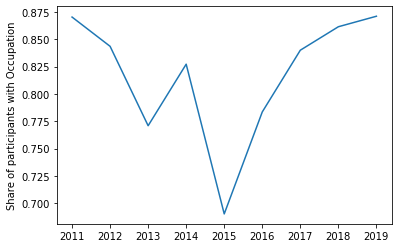

In [64]:
plt.plot(years, Occupation_rate)
plt.ylabel('Share of participants with Occupation')
plt.show;

### **Question 2**
Which programming languages are most popular? Are there any significant changes over time?

In [41]:
# we first have to find the columns where information about programming languages are stored. We use Python as search word.
search=['python', 'Python']
index=5
list_df[index][1][list_df[index][1].isin(search)].stack()

78     tech_do      Python
150    tech_want    Python
177    tech_do      Python
360    tech_want    Python
573    tech_do      Python
                     ...  
55880  tech_do      Python
55907  tech_do      Python
56011  tech_do      Python
       tech_want    Python
56024  tech_want    Python
Length: 975, dtype: object

In [42]:
#for 2016 to 2019 we find one column in each survey containing the languages currently working on and languages which want to be learned in future
columns_2016 = ['tech_do','tech_want']
columns_2017 = ['WantWorkLanguage', 'HaveWorkedLanguage']
columns_2018 = ['LanguageWorkedWith', 'LanguageDesireNextYear']
columns_2019 = ['LanguageWorkedWith', 'LanguageDesireNextYear']

In [43]:
#the following fuunction counts the values for each programming languages
def value_counts(index, columns, count_column=0, list_df=list_df):
    '''
    INPUT: 
           index: index of the dataframe in the list of dataframes per year
           columns: list of columns
           count_columns: column index where values should be counted
           list_df: overall list of dataframes per year

    OUTPUT:
           dataframe with value counts as share of total entries in the dataframe
    '''    
    #1. drop all rows with nan values
    df_year = list_df[index][1][columns].dropna()
    #2. As languages are stored in column with ';' separation we have to split in individual columns first
    df_year = df_year[df_year.columns[count_column]].str.split(';',expand=True)
    #3. This new dataframe we transform into one column array
    nparray = np.array(df_year).reshape(-1,)
    #4. Cut leading ' ' due to split function
    nparray = nparray.astype('U')
    nparray = np.char.lstrip(nparray, ' ')
    year = list_df[index][0]
    #5. Transform array into dataframe with year as column name
    df = pd.DataFrame(nparray, columns = [year]).dropna()
    #6. return a dataframe with value counts for each languages as share of total participants 
    return pd.DataFrame(df[year].value_counts()) / len(list_df[index][1])

In [44]:
# concatenate the dataframes for each year and both columns
df_pl_work = pd.concat([value_counts(5, columns_2016), 
                        value_counts(6, columns_2017),
                        value_counts(7, columns_2018),
                        value_counts(8, columns_2019)], axis=1, sort=False)

df_pl_future = pd.concat([value_counts(5, columns_2016, count_column=1), 
                         value_counts(6, columns_2017, count_column=1),
                         value_counts(7, columns_2018, count_column=1),
                         value_counts(8, columns_2019, count_column=1)], axis=1, sort=False)

In [45]:
# create sorted dataframes with top 15 programming languages
df_pl_work_formatted = df_pl_work.sort_values(by=['2019','2018','2017','2016'], ascending=False).head(15).dropna().drop(['None'])
df_pl_future_formatted = df_pl_future.sort_values(by=['2019','2018','2017','2016'], ascending=False).head(15).dropna().drop(['None'])

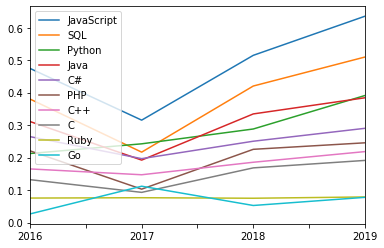

In [46]:
# plot: languages currently worked on
df_pl_work_formatted.T.plot();

In [47]:
# table: languages currently worked on
df_pl_work_formatted

,2016,2017,2018,2019
JavaScript,0.474442,0.315302,0.514805,0.635161
SQL,0.380136,0.216765,0.420333,0.509558
Python,0.212565,0.242411,0.288058,0.391087
Java,0.310941,0.192267,0.334449,0.384089
C#,0.264465,0.196782,0.250387,0.290112
PHP,0.220721,0.102818,0.225472,0.245503
C++,0.165108,0.147163,0.185666,0.218433
C,0.132019,0.092952,0.168348,0.191285
Ruby,0.075424,0.076471,0.074867,0.078856
Go,0.026611,0.111885,0.052572,0.077630


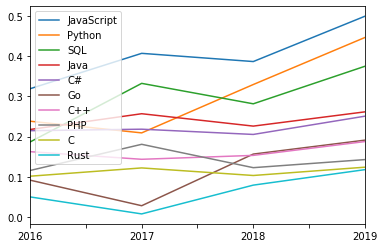

In [48]:
# plot: languages want to work in future
df_pl_future_formatted.T.plot();

In [49]:
# table: languages want to work in future
df_pl_future_formatted

,2016,2017,2018,2019
JavaScript,0.319275,0.407437,0.386991,0.499848
Python,0.238390,0.209293,0.329756,0.446880
SQL,0.186650,0.332639,0.281736,0.375201
Java,0.217740,0.257024,0.226180,0.261681
C#,0.214778,0.218478,0.205422,0.250892
Go,0.091540,0.027864,0.156522,0.191206
C++,0.162520,0.143524,0.153245,0.187674
PHP,0.115634,0.180845,0.122644,0.142749
C,0.101392,0.122023,0.103171,0.123848
Rust,0.049813,0.007453,0.079156,0.117717


### **Question 3**
Which kind of developers are highest paid among the participants in the 2019 survey? 

In [3]:
# load survey 2019 from dataframe list
df = list_df[8][1]


In [4]:
# target column for analysis is DevType
df = df.dropna(subset=['DevType'], axis=0)

In [5]:
# for further analysis values have to be split as multiple developer types are named within one column
df['DevType']

1        Developer, desktop or enterprise applications;...
2        Designer;Developer, back-end;Developer, front-...
3                                    Developer, full-stack
4        Academic researcher;Developer, desktop or ente...
5        Data or business analyst;Data scientist or mac...
                               ...                        
88871                                              Student
88872    Academic researcher;Designer;Developer, game o...
88875                                  Academic researcher
88876    Designer;Developer, front-end;Developer, full-...
88877    Developer, back-end;Developer, desktop or ente...
Name: DevType, Length: 81335, dtype: object

In [6]:
# define some columns for further analysis out of the total columns list
df = df[['YearsCode',
        'ConvertedComp',
             'Age',
             'JobSat',
             'WorkWeekHrs',
             'DevType']]


In [7]:
# generate a new dataframe with all dev types split in separate columns
df2 = pd.concat([df[['Age','JobSat','WorkWeekHrs','YearsCode','ConvertedComp']], df['DevType'].str.split(';',expand=True)], axis=1)
df2

,Age,JobSat,WorkWeekHrs,YearsCode,ConvertedComp,0,1,2,3,4,...,14,15,16,17,18,19,20,21,22,23
1,19.0,NaN,NaN,NaN,NaN,"Developer, desktop or enterprise applications","Developer, front-end",None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,28.0,Slightly satisfied,40.0,3,8820.0,Designer,"Developer, back-end","Developer, front-end","Developer, full-stack",None,...,None,None,None,None,None,None,None,None,None,None
3,22.0,Slightly satisfied,80.0,3,61000.0,"Developer, full-stack",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,30.0,Slightly dissatisfied,55.0,16,NaN,Academic researcher,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",None,...,None,None,None,None,None,None,None,None,None,None
5,28.0,Slightly satisfied,15.0,13,366420.0,Data or business analyst,Data scientist or machine learning specialist,Database administrator,"Engineer, data",None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88871,21.0,NaN,NaN,10,NaN,Student,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
88872,25.0,NaN,NaN,9,NaN,Academic researcher,Designer,"Developer, game or graphics",Scientist,Student,...,None,None,None,None,None,None,None,None,None,None
88875,NaN,NaN,NaN,1,NaN,Academic researcher,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
88876,40.0,NaN,NaN,18,NaN,Designer,"Developer, front-end","Developer, full-stack",None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
# convert the dataframe to one column for Salary and one with 'Job' / DevType
start_index=5

x = np.array(df2[['Age','JobSat','WorkWeekHrs','YearsCode','ConvertedComp',df2.columns[start_index]]])

for i in range(0,len(df2.columns)-(start_index+1)):
    x = np.vstack((x,np.array(df2[['Age','JobSat','WorkWeekHrs','YearsCode','ConvertedComp',df2.columns[i+start_index+1]]])))
df3 = pd.DataFrame(x, columns=['Age','JobSat','WorkWeekHrs','YearsCode','Salary', 'Job']).dropna(subset=['Job'], axis=0)    

In [9]:
# all missing Salary data will be filled with the median of the corresponding DevType / Job
def fillna(column):
    mapping_dict = {}
    Jobs = df3['Job'].unique()
    for j in range(len(Jobs)):
        mapping_dict.update( {Jobs[j] : df3[column][df3['Job'] == Jobs[j]].median()} )
    df3[column] = df3[column].fillna(df3['Job'].map(mapping_dict))

In [10]:
fillna('Salary')

In [11]:
# before the same function can be applied to column YearsCode we have replace the categorical values with numbers and convert the datatype
df3['YearsCode'][df3['YearsCode'] == 'Less than 1 year'] = 1
df3['YearsCode'][df3['YearsCode'] == 'More than 50 years'] = 50
df3['YearsCode'] = pd.to_numeric(df3['YearsCode'])

In [13]:
fillna('YearsCode')
fillna('Age')
fillna('WorkWeekHrs')
df3

,Age,JobSat,WorkWeekHrs,YearsCode,Salary,Job
0,19.0,NaN,40.0,11.0,56142.0,"Developer, desktop or enterprise applications"
1,28.0,Slightly satisfied,40.0,3.0,8820.0,Designer
2,22.0,Slightly satisfied,80.0,3.0,61000.0,"Developer, full-stack"
3,30.0,Slightly dissatisfied,55.0,16.0,38388.0,Academic researcher
4,28.0,Slightly satisfied,15.0,13.0,366420.0,Data or business analyst
...,...,...,...,...,...,...
1944669,30.0,Very dissatisfied,40.0,50.0,55000.0,System administrator
1951854,30.0,NaN,40.0,43.0,55000.0,System administrator
1951896,22.0,NaN,40.0,4.0,55000.0,System administrator
1951914,30.0,NaN,40.0,3.0,55000.0,System administrator


In [14]:
# for job satisfaction we convert the categories to a numerical ranking with nan as 0
df3['JobSat'] = df3['JobSat'].fillna('na')

In [15]:
#create a mapping dictionary
mapping_dict = {}
for j in range(len(df3['JobSat'].unique())):
    mapping_dict.update( {df3['JobSat'].unique()[j] : j} )
mapping_dict

{'na': 0,
 'Slightly satisfied': 1,
 'Slightly dissatisfied': 2,
 'Neither satisfied nor dissatisfied': 3,
 'Very satisfied': 4,
 'Very dissatisfied': 5}

In [16]:
#replace the categorical values with numbers
df3['JobSat'].replace(mapping_dict, inplace=True)

In [19]:
df4 = df3
df4

,Age,JobSat,WorkWeekHrs,YearsCode,Salary,Job
0,19.0,0,40.0,11.0,56142.0,"Developer, desktop or enterprise applications"
1,28.0,1,40.0,3.0,8820.0,Designer
2,22.0,1,80.0,3.0,61000.0,"Developer, full-stack"
3,30.0,2,55.0,16.0,38388.0,Academic researcher
4,28.0,1,15.0,13.0,366420.0,Data or business analyst
...,...,...,...,...,...,...
1944669,30.0,5,40.0,50.0,55000.0,System administrator
1951854,30.0,0,40.0,43.0,55000.0,System administrator
1951896,22.0,0,40.0,4.0,55000.0,System administrator
1951914,30.0,0,40.0,3.0,55000.0,System administrator


In [20]:
# we now calculate the replace the 0 values with the median JobSat value for each job and store the value in another mapping dictionary
mapping_dict = {}
df_temp = df4
#for calulcation of median per job no nan (0) values are considered as they will be replaced by this calculation
df_temp = df_temp[df_temp['JobSat'] != 0]

Jobs = df4['Job'].unique() 
for j in range(len(Jobs)):
        mapping_dict.update( {Jobs[j] : round(df_temp['JobSat'][df_temp['Job'] == Jobs[j]].median())} )

In [21]:
mapping_dict

{'Developer, desktop or enterprise applications': 3,
 'Designer': 3,
 'Developer, full-stack': 3,
 'Academic researcher': 3,
 'Data or business analyst': 3,
 'Developer, back-end': 3,
 'Database administrator': 3,
 'Student': 3,
 'Developer, front-end': 3,
 'DevOps specialist': 3,
 'Developer, mobile': 3,
 'Engineering manager': 3,
 'System administrator': 3,
 'Data scientist or machine learning specialist': 3,
 'Engineer, data': 3,
 'Developer, embedded applications or devices': 3,
 'Developer, QA or test': 3,
 'Engineer, site reliability': 3,
 'Product manager': 3,
 'Educator': 3,
 'Marketing or sales professional': 3,
 'Senior executive/VP': 4,
 'Developer, game or graphics': 3,
 'Scientist': 3}

In [22]:
df5 = df4

In [27]:
# all rows with JobSat = 0 are replaced with the median value from the mapping dict
df5['JobSat'][df5['JobSat'] == 0] = df5['Job'][df5['JobSat'] == 0].map(mapping_dict)
df5

,Age,JobSat,WorkWeekHrs,YearsCode,Salary,Job
0,19.0,3,40.0,11.0,56142.0,"Developer, desktop or enterprise applications"
1,28.0,1,40.0,3.0,8820.0,Designer
2,22.0,1,80.0,3.0,61000.0,"Developer, full-stack"
3,30.0,2,55.0,16.0,38388.0,Academic researcher
4,28.0,1,15.0,13.0,366420.0,Data or business analyst
...,...,...,...,...,...,...
1944669,30.0,5,40.0,50.0,55000.0,System administrator
1951854,30.0,3,40.0,43.0,55000.0,System administrator
1951896,22.0,3,40.0,4.0,55000.0,System administrator
1951914,30.0,3,40.0,3.0,55000.0,System administrator


In [28]:
df_group = df5.groupby('Job').median().sort_values(by=['Salary'], ascending=False)
df_group

,Age,JobSat,WorkWeekHrs,YearsCode,Salary
Job,,,,,
Engineering manager,34.0,3,40.0,17.0,95000.0
Senior executive/VP,36.0,4,45.0,19.0,91752.0
"Engineer, site reliability",31.0,3,40.0,14.0,85000.0
DevOps specialist,31.0,3,40.0,13.0,71036.0
"Engineer, data",29.0,3,40.0,10.0,66453.0
Data scientist or machine learning specialist,29.0,3,40.0,10.0,61071.0
Product manager,32.0,3,40.0,13.0,60000.0
Data or business analyst,31.0,3,40.0,10.0,59004.0
"Developer, full-stack",29.0,3,40.0,10.0,57425.5


### **Extra: Question 4**
Finally we try to implement a tree based regression model to predict the Salary figures in the survey 2019? Without much parameter optimisation we try find relevant features by uing feature importance

In [65]:
# load survey 2019 from dataframe list
df = list_df[8][1]

In [66]:
# this function prepares the input data into target and features, fills numeric values with mean and encodes categorical values.

def data_prep(df, fill_na=True, label_encode=True, get_dummies=False, cutoff=500):
    '''
    INPUT:
        df: Input datafram
        fill_na: if True nan values of numeric columns will be filled with mean of the column
        label_encode: if True categorical values will be encoded
        get_dummies: if False simple label encoding will be applied, if True one-hot-encoding
        cutoff: categorical columns will be dropped if maximum number of unique values is above the cutoff value (prevents overfitting)
    
    OUTPUT:
        X: model features
        y: model target
    '''
    #1. drop nan for target column
    drop_sal_df = df.dropna(subset=['ConvertedComp'], axis=0)

    #2. set features and target columns
    X = drop_sal_df.drop(['Respondent','ConvertedComp', 'CompTotal'], axis=1)
    #X = drop_sal_df[['Country', 'Age', 'Student','WorkWeekHrs','OrgSize']]
    y = drop_sal_df['ConvertedComp']    
    
    #3. Fill numeric columns with the mean
    if fill_na == True:
        num_vars = X.select_dtypes(exclude=['object']).columns
        for col in num_vars:
            X[col].fillna((X[col].mode()[0]), inplace=True)

    #4. Encode categorical labels 
    if label_encode == True:
        cat_vars = X.select_dtypes(include=['object']).columns
        for col in cat_vars:
            if len(X[col].unique()) > cutoff or len(X[col].unique()) < 2:
                X = X.drop([col], axis=1)
            else:     
                # simple label encoding with numbers (sufficient for tree models)
                if get_dummies == False:
                    X[col] = LabelEncoder().fit_transform(X[col].astype(str))       
                # one hot encoding of labels
                else:
                    try:
                        # for each cat add dummy var, drop original column
                        X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)
                    except:
                        continue
                
    return X, y

In [71]:
# Use prep function and perform train / test split
X, y = data_prep(df, label_encode=True, get_dummies=False, cutoff=500)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [72]:
# as model we use a planin RandomForest with default parameters
model = RandomForestRegressor()
model.fit(X_train,y_train)
print('Training Score: {:.2f}  \n Validation Score: {:.2f}'.format(model.score(X_train, y_train), 
                                                                   model.score(X_test, y_test)))

Training Score: 0.95  
 Validation Score: 0.62


In [69]:
# feature importances can be retrived with the following method
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [70]:
# top 10 features for salary prediction
feature_importances.head(10)

,importance
CompFreq,0.387726
Country,0.109013
Employment,0.072261
Age,0.032739
CurrencySymbol,0.021605
CurrencyDesc,0.017261
JobFactors,0.015775
WorkWeekHrs,0.015678
WorkChallenge,0.014246
EduOther,0.013407
